In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import stats


In [2]:
#loading data

df=pd.read_csv(r"cardekho - Copy.csv")
df.head(5)
#

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [4]:
#check for null values
df.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
print(df.isna())

       name   year  selling_price  km_driven   fuel  seller_type  \
0     False  False          False      False  False        False   
1     False  False          False      False  False        False   
2     False  False          False      False  False        False   
3     False  False          False      False  False        False   
4     False  False          False      False  False        False   
...     ...    ...            ...        ...    ...          ...   
8123  False  False          False      False  False        False   
8124  False  False          False      False  False        False   
8125  False  False          False      False  False        False   
8126  False  False          False      False  False        False   
8127  False  False          False      False  False        False   

      transmission  owner  mileage(km/ltr/kg)  engine  max_power  seats  
0            False  False               False   False      False  False  
1            False  False          

In [6]:
# missing values
count_missing=df.isnull().sum()
percent_missing=(df.isnull().sum()/len(df))*100

missing_data = pd.DataFrame({
    'Missing Count': count_missing,
    'Missing Percent (%)': percent_missing
})
missing_data = missing_data[missing_data['Missing Count'] > 0]

print(missing_data)


                    Missing Count  Missing Percent (%)
mileage(km/ltr/kg)            221             2.718996
engine                        221             2.718996
max_power                     215             2.645177
seats                         221             2.718996


#### there is no missing values in the selling-price column
-In machine learning, the target variable (dependent variable) is the value we want the model to predict. Missing values in the target column make training impossible or unreliable

In [7]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [8]:
mean_mileage=df["mileage(km/ltr/kg)"].mean()
print(mean_mileage)


19.41878335651954


In [9]:
#fill missin values
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(mean_mileage)
#filling missing values can be be better than dropping rows because it preserves the data size


In [10]:
df=df.drop_duplicates()
print(df["mileage(km/ltr/kg)"])

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8121    18.90
8122    22.54
8123    18.50
8124    16.80
8125    19.30
Name: mileage(km/ltr/kg), Length: 6926, dtype: float64


In [11]:
df.year=2025-df.year
print(df.year)

0       11
1       11
2       19
3       15
4       18
        ..
8121    12
8122    11
8123    12
8124    18
8125    16
Name: year, Length: 6926, dtype: int64


In [12]:
from datetime import datetime
current_year= datetime.now().year


In [13]:
#checking unique values
print(df.fuel.unique(),
df.fuel.nunique())

['Diesel' 'Petrol' 'LPG' 'CNG'] 4


In [14]:
df["transmission"]= df["transmission"].str.capitalize()
print(df)

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI    11         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition    11         370000     120000   
2              Honda City 2017-2020 EXi    19         158000     140000   
3             Hyundai i20 Sportz Diesel    15         225000     127000   
4                Maruti Swift VXI BSIII    18         130000     120000   
...                                 ...   ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS    12         260000      50000   
8122         Hyundai i20 Magna 1.4 CRDi    11         475000      80000   
8123                  Hyundai i20 Magna    12         320000     110000   
8124              Hyundai Verna CRDi SX    18         135000     119000   
8125             Maruti Swift Dzire ZDi    16         382000     120000   

        fuel seller_type transmission                 owner  \
0     Diesel  Individual       Manua

Text(0.5, 0, 'Price')

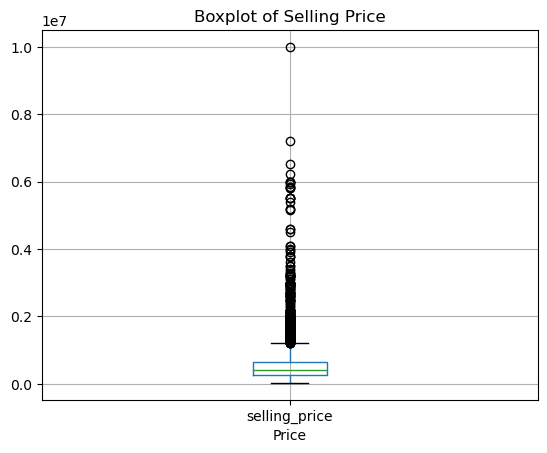

In [15]:
#9. Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot("selling_price")
plt.title('Boxplot of Selling Price')
plt.xlabel('Price')

In [16]:
#removeing outliers
df = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,6906.000000,6.906000e+03,6.906000e+03,6906.000000,6698.000000,6698.000000
mean,11.594411,5.013782e+05,7.414806e+04,19.469842,1428.192744,5.436399
std,4.074771,4.247149e+05,5.836971e+04,3.978736,490.988361,0.984531
min,5.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,8.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,5.000000
50%,11.000000,4.000000e+05,7.000000e+04,19.418783,1248.000000,5.000000
75%,14.000000,6.300000e+05,1.000000e+05,22.320000,1498.000000,5.000000
max,42.000000,4.600000e+06,2.360457e+06,33.440000,3604.000000,14.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot("selling_price")
plt.title('Boxplot of Selling Price')
plt.xlabel('Price')

Text(0.5, 0, 'Price')

In [18]:
# standardize  the head columns
df = df.rename(columns={'sellingprice': 'selling_price'})
df= df.rename(columns= {"kmdriven": "km_driven"})
df= df.rename(columns= {"sellertype": "seller_type"})
df= df.rename(columns= {"maxpower": "max_power"})
df= df.rename(columns= {"priceperkm": "price_per_km"})
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [19]:
print(df['age'].dtype, df["selling_price"].dtype, df["mileage(km/ltr/kg)"].dtype)

KeyError: 'age'

In [ ]:
df["price_per_km"]=df["selling_price"]/df["mileage(km/ltr/kg)"]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,price_per_km
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502.365184
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,8926.553672
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,9782.608696
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,8074.534161


In [ ]:
#reset the index
df= df.reset_index()
print(df)

      index                               name  year  selling_price  \
0         0             Maruti Swift Dzire VDI    11         450000   
1         1       Skoda Rapid 1.5 TDI Ambition    11         370000   
2         2           Honda City 2017-2020 EXi    19         158000   
3         3          Hyundai i20 Sportz Diesel    15         225000   
4         4             Maruti Swift VXI BSIII    18         130000   
...     ...                                ...   ...            ...   
6901   8121  Maruti Wagon R VXI BS IV with ABS    12         260000   
6902   8122         Hyundai i20 Magna 1.4 CRDi    11         475000   
6903   8123                  Hyundai i20 Magna    12         320000   
6904   8124              Hyundai Verna CRDi SX    18         135000   
6905   8125             Maruti Swift Dzire ZDi    16         382000   

      km_driven    fuel seller_type transmission                 owner  \
0        145500  Diesel  Individual       Manual           First Owner   

In [ ]:

df = df.drop("index", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6701 non-null   object 
 11  seats               6698 non-null   float64
 12  price_per_km        6906 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 701.5+ KB


In [ ]:
#save your cleaned data set
df.to_csv('cleaned_cars.csv', index=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,price_per_km
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502.365184
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,8926.553672
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,9782.608696
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,8074.534161


In [ ]:
#average selling price
df.selling_price.mean()

501378.18114682887

In [ ]:
# common fueltype
value_counts = df["fuel"].value_counts()
print(value_counts)

fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64


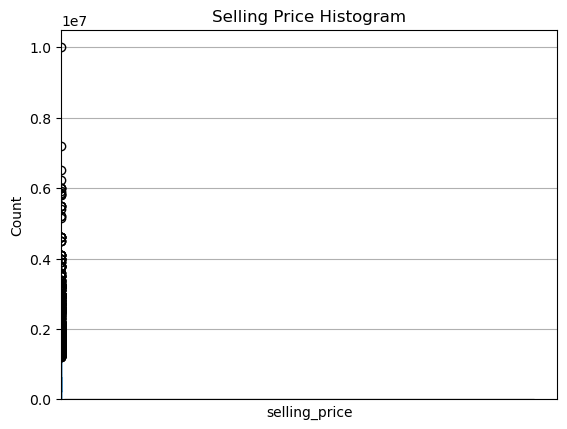

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="selling_price",bins=40,color="Green")
plt.title("Selling Price Histogram")
plt.xlabel("selling_price")
plt.show()